<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/4_4_Regression_Assumptions_%26_PySpark_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assumptions & PySpark

In this lecture, we will view the assumptions that Regression is built from followed by a demonstration of Linear Regression using PySpark on the Boston Housing Data from sklearn.

##Normality of Error Term

Linear Regression, or Ordinary Least Squares (OLS) implicitly assumes a normal distribution in the data.

To be exact, we expect a normal distribution **in the regression error term**.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


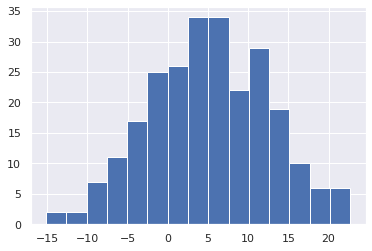

(array([ 4.,  4.,  7., 13., 18., 34., 36., 37., 28., 29., 17., 10., 11.,
         1.,  1.]),
 array([-11.21303046,  -9.66944139,  -8.12585233,  -6.58226327,
         -5.0386742 ,  -3.49508514,  -1.95149608,  -0.40790702,
          1.13568205,   2.67927111,   4.22286017,   5.76644924,
          7.3100383 ,   8.85362736,  10.39721643,  11.94080549]),
 <a list of 15 Patch objects>)

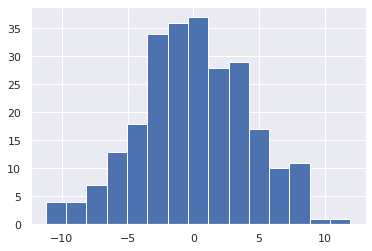

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()
rng = np.random.RandomState(1)

x = 10 * rng.rand(250)
y = 2 * x - 5 + (4 * rng.randn(250))
plt.hist(y, bins=15)
plt.show()
est = sm.OLS(y, sm.add_constant(x)).fit()
plt.hist(est.resid, bins=15)

Here this is easily satisfied.

Even with less-than-normal $y$ data, the regression model can normalize it if there are many features:

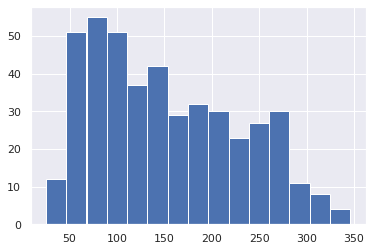

(array([ 4.,  4.,  7., 13., 18., 34., 36., 37., 28., 29., 17., 10., 11.,
         1.,  1.]),
 array([-11.21303046,  -9.66944139,  -8.12585233,  -6.58226327,
         -5.0386742 ,  -3.49508514,  -1.95149608,  -0.40790702,
          1.13568205,   2.67927111,   4.22286017,   5.76644924,
          7.3100383 ,   8.85362736,  10.39721643,  11.94080549]),
 <a list of 15 Patch objects>)

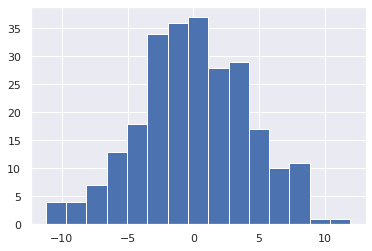

In [ ]:
from sklearn.datasets import load_diabetes

boston = pd.DataFrame(load_diabetes().data,columns = load_diabetes().feature_names )
y = load_diabetes().target

plt.hist(y, bins=15)
plt.show()
X = sm.add_constant(boston)
sm.OLS(y, X).fit().summary()
plt.hist(est.resid, bins=15)

Note that normality of errors is a condition of **severity** rather than absolutes.

Even published research often has non-normal OLS estimates when it's not too severe a problem.


##Linear Independence

No two variables should be a linear combination of each other.

Otherwise, the $X$ matrix does not have **full [column rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)#Main_definitions)** and its square can't be inverted for the normal equation to hold:



In [ ]:
sns.set()
rng = np.random.RandomState(1)

x = 10 * rng.rand(250)
x = sm.add_constant(x)
x = np.concatenate([x, (3*x[:, 1] + 4)[:, np.newaxis]], axis=1)

y = 2 * x[:, 1] - 5 + (4 * rng.randn(250))

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     556.6
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           2.54e-65
Time:                        09:54:49   Log-Likelihood:                -712.07
No. Observations:                 250   AIC:                             1428.
Df Residuals:                     248   BIC:                             1435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9171      0.231    -12.639      0.000      -3.372      -2.463
x1             3.7060      0.285     13.012      0.000       3.145       4.267
x2            -0.5505      0.070     -7.881      0.000      -0.688      -0.413
==============================================================================
Omnibus:                        0.249   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.333
Skew:                          -0.071   Prob(JB):                        0.847
Kurtosis:                       2.892   Cond. No.                     6.22e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multicollinearity

This is related to **multicollinearity** (which is just a regression term for feature correlation).

Having linear dependence means *perfect multicollinearity* (since linear combinations of vectors have correlation = 1).

That said, collinear features **do not bias coefficients** but however they do **reduce efficiency** (eg. artificially increase the coefficient variance)


###Homoscedasticity

Homoscedasticity means **constant variance**.

The evil twin brother is *heteroscedasticity* (HSK) which means **sample-dependent variance**.

This doesn't affect the coefficient value, but do **invalidate the p-values** and coefficient standard errors

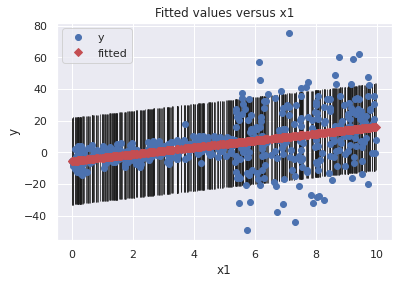

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     106.4
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           9.87e-23
Time:                        09:58:06   Log-Likelihood:                -2026.9
No. Observations:                 500   AIC:                             4058.
Df Residuals:                     498   BIC:                             4066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5358      1.240     -4.465      0.000      -7.972      -3.100
x1             2.1728      0.211     10.313      0.000       1.759       2.587
==============================================================================
Omnibus:                       44.559   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.420
Skew:                          -0.096   Prob(JB):                     3.05e-49
Kurtosis:                       6.269   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
rng = np.random.RandomState(1)

x = (10 * rng.rand(500))
x.sort()
x = sm.add_constant(x)
# First half with low noise
y = 2 * x[:250, 1] - 5 + (4 * rng.randn(250))
# More noise
y2 = 2 * x[250:, 1] - 5 + (20 * rng.randn(250))
# Join
y = np.concatenate([y, y2], axis=0)

est = sm.OLS(y, x).fit()
sm.graphics.plot_fit(est, 'x1')
plt.show()
est.summary()

**Robust Standard Errors**

The easiest way to deal with HSK is with [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors) of Heteroscedasticity-Consistent (HC) standard errors.

There are quite a few methods (HC0-HC3), which come as parameters in the `fit` method. Generally people just always use HC2 unless noted otherwise.

In fact, you should generally just always use HC2 unless you have a good reason not to.



In [ ]:
est2 = sm.OLS(y, x).fit(cov_type='HC2')
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           9.22e-26
Time:                        10:01:12   Log-Likelihood:                -2026.9
No. Observations:                 500   AIC:                             4058.
Df Residuals:                     498   BIC:                             4066.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5358      0.630     -8.787      0.000      -6.771      -4.301
x1             2.1728      0.196     11.108      0.000       1.789       2.556
==============================================================================
Omnibus:                       44.559   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.420
Skew:                          -0.096   Prob(JB):                     3.05e-49
Kurtosis:                       6.269   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

##Exogeneity

This assumes the effect of X on y is independent (exogenous, literally "comes from outside")

- **Omitted Variable Bias** X only affects y because it's correlated with another variable which actually affects y. Chocolate consumption and Nobel prizes for instance.

- **Reverse Causality** Y is actually the variable causing the change in X.

- **Two Way Causality** Both y affect X as well as X affecting Y.

Regressions that have this sort of bad real-word specification are said to be **endogenous** (eg. the changes are internal to the model instead of being the effect of X on y)


##Random Sampling

Anything that is not randomly sampled breaks core statistical assumptions. It's possible to fix this with more sophisticated methods, but is often lousy and difficult.

#Regression With PySpark

Let's use PySpark to create and run a regression model on the Boston Housing Dataset.

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
y = load_boston().target
y = list(y)
boston['MV'] = y


In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
#Creating a spark dataframe from a Pandas DataFrame
from pyspark import SparkConf 
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)
house_df = sqlContext.createDataFrame(boston).show()
house_df

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|  MV|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87| 0.0|0.524|6.012| 66.6|5.5605|5.0|311.0|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87| 0.0|0.524|6.172| 96.1|5.9505|5.0|311.0|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87| 0.0|0.524|5.631|100.0|

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()
sparkDF = spark.createDataFrame(boston)
sparkDF.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MV: double (nullable = true)



Now that we have read in our data, let's turn our rows of the DataFrame into vectors which we can use to compute the parameters in our model. By Vectorizing our data we are able to speed up computation. [Read Here](https://www.reddit.com/r/explainlikeimfive/comments/4namsc/eli5why_does_vectorized_code_run_faster_than/) about why vectorization decreases computing time.

In [ ]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(sparkDF)
vhouse_df = vhouse_df.select(['features', 'MV'])
vhouse_df.show(3)

+--------------------+----+
|            features|  MV|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



Now that we have created vectors for our data, we will split our data into **Training** and **Test** Sets. The training set is the set of data in which we run our parameter calculations on and the test set is the set that we use to assess how well our model fits new data.

In [ ]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.013581779306845633,-0.025425020186179044,2.829595036474371,-2.9288230989785786,4.1900562692388155,0.0,-0.6118282621636236,0.004194263059776491,0.0,-0.7252893605825874,0.007631464463353928,-0.5880759689442485]
Intercept: 18.330115373290507


In [ ]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 5.229561
r2: 0.701501


Here we have RMSE as a measure of loss of our model. Underneath we have our $R^2$ value which gives us a measure of how much of the variability in the data comes from the model. The closer to 1 $R^2$ is, the better our model is. 

**NOTE:** The $R^2$ value our model gives with the training set does not tell us what the $R^2$ value with the test set.

In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MV","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|  MV|            features|
+------------------+----+--------------------+
|  17.2732644387141|18.9|[0.0136,75.0,4.0,...|
| 31.66166587874494|31.6|[0.01432,100.0,1....|
|31.614676368995013|32.9|[0.01778,95.0,1.4...|
| 31.56944451868472|34.7|[0.02729,0.0,7.07...|
| 26.55983309265217|28.7|[0.02985,0.0,2.18...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.741817


In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.1562


In [ ]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.5000000000000004, 0.4350901491555103, 0.24659413568942984, 0.22021140617191753, 0.19086029160828763, 0.18546464585858352, 0.18473532755102834, 0.1832705906448468, 0.1829251797162075, 0.1827597099321171, 0.18270365061015306]
+--------------------+
|           residuals|
+--------------------+
|  -6.994968121238173|
|   4.774794416404433|
|  11.455581907492338|
| -1.6505534599066216|
|   6.773458232706648|
|  10.493029809553363|
| -1.7854429466878976|
|   5.531250124147533|
|-0.21677162146777817|
| -3.7942333880470045|
|  1.2323802154345493|
| -1.9397144675859437|
|  3.9242645384288046|
|  3.1213904500404226|
|  2.1588246232461827|
|  -4.048773554369504|
|   10.28132247965047|
|  -5.597887002029594|
| -0.9131862663376431|
|  -5.036075596053184|
+--------------------+
only showing top 20 rows

